In [1]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
df.columns = ['y']
df['ds'] = df.index
df.head()

,y,ds
Month,,
1949-01-01,112,1949-01-01
1949-02-01,118,1949-02-01
1949-03-01,132,1949-03-01
1949-04-01,129,1949-04-01
1949-05-01,121,1949-05-01


In [4]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=12, freq='MS')
future.tail()

15:39:09 - cmdstanpy - INFO - Chain [1] start processing
15:39:09 - cmdstanpy - INFO - Chain [1] done processing


,ds
151,1961-08-01
152,1961-09-01
153,1961-10-01
154,1961-11-01
155,1961-12-01


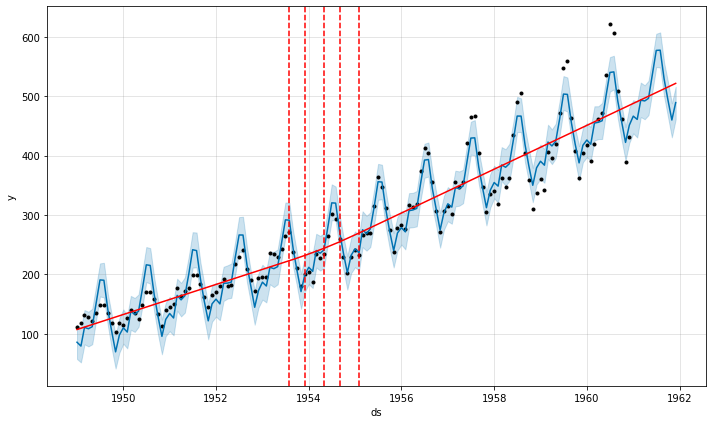

In [5]:
forecast = m.predict(future)
fig = m.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m, forecast)

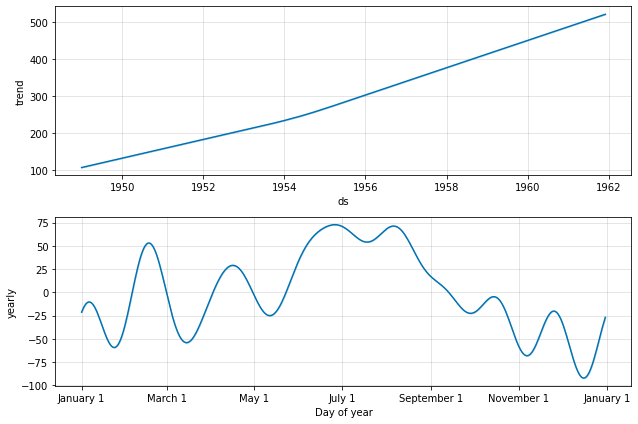

In [6]:
m.plot_components(forecast);

15:41:33 - cmdstanpy - INFO - Chain [1] start processing
15:41:33 - cmdstanpy - INFO - Chain [1] done processing


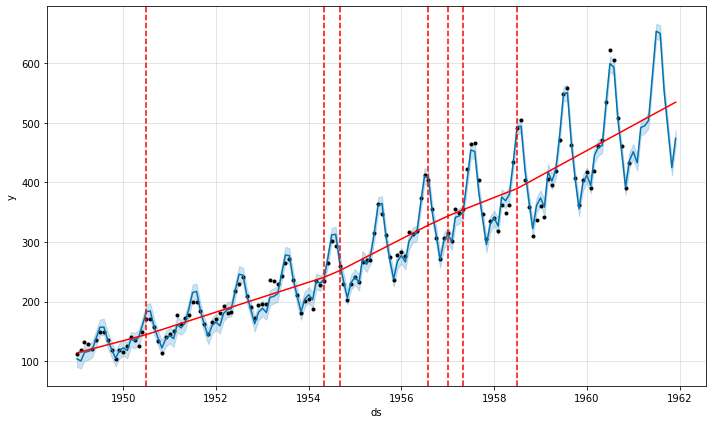

In [7]:
m2 = Prophet(seasonality_mode='multiplicative')
m2.fit(df)
future = m2.make_future_dataframe(periods=12, freq='MS')
forecast = m2.predict(future)
fig = m2.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m2, forecast)

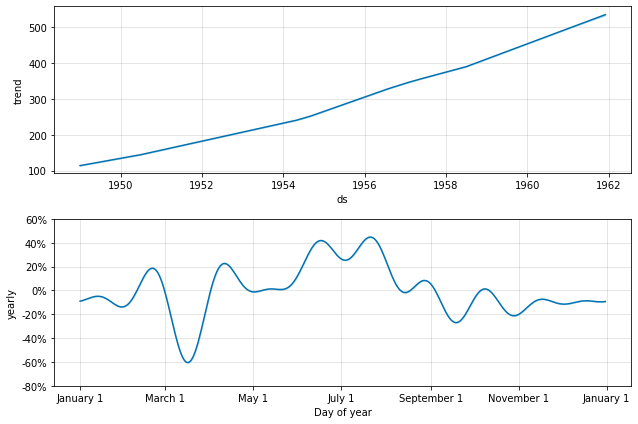

In [8]:
m2.plot_components(forecast);

15:42:13 - cmdstanpy - INFO - Chain [1] start processing
15:42:13 - cmdstanpy - INFO - Chain [1] done processing


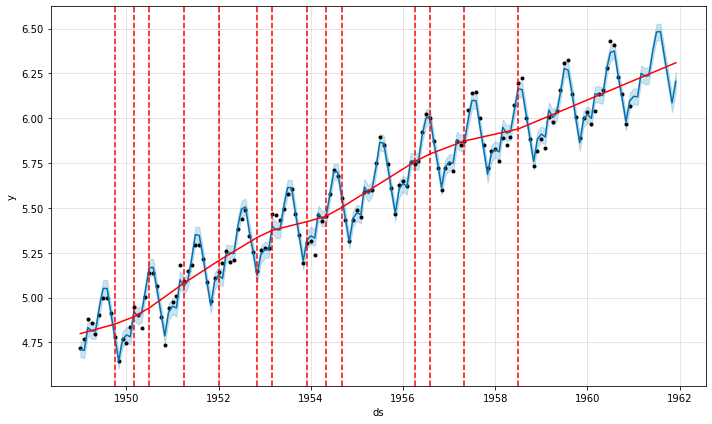

In [9]:
logdf = df.copy()
logdf['y'] = np.log(logdf['y'])
m3 = Prophet()
m3.fit(logdf)
future = m3.make_future_dataframe(periods=12, freq='MS')
forecast = m3.predict(future)
fig = m3.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m3, forecast)

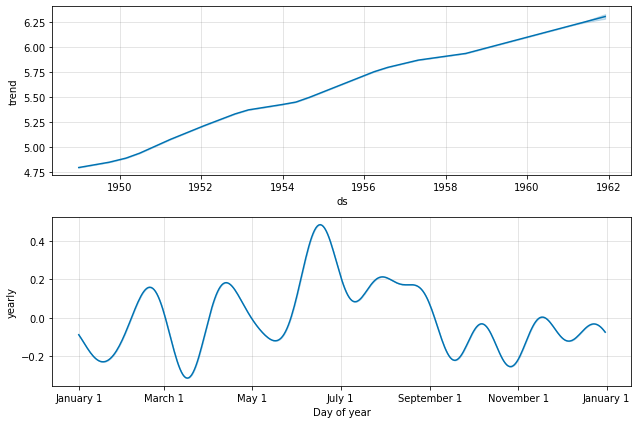

In [10]:
m3.plot_components(forecast);

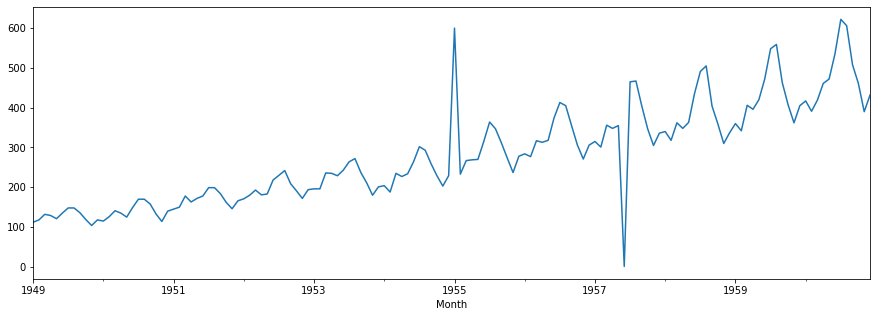

In [11]:
df.loc['1955-01-01', 'y'] = 600
df.loc['1957-06-01', 'y'] = 1
df['y'].plot(figsize=(15, 5));

15:43:11 - cmdstanpy - INFO - Chain [1] start processing
15:43:11 - cmdstanpy - INFO - Chain [1] done processing


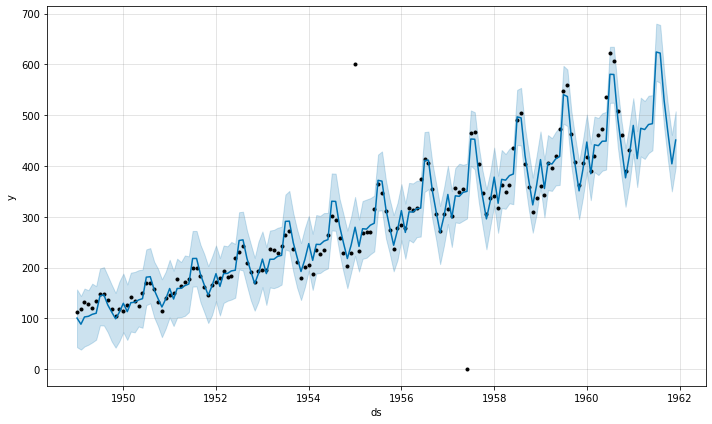

In [12]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)
m.plot(forecast); # wide confidence interval

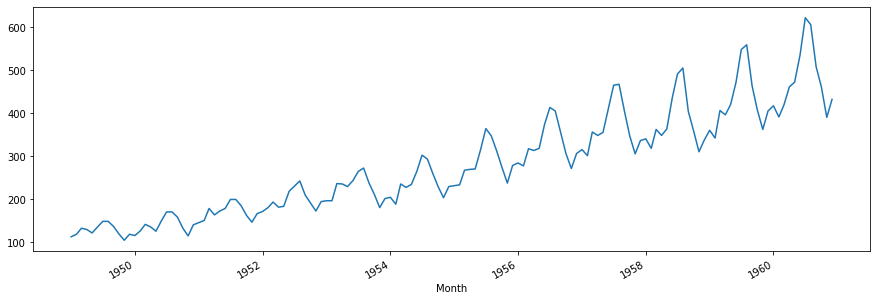

In [13]:
df2 = df[~df.index.isin(['1955-01-01', '1957-06-01'])]
df2['y'].plot(figsize=(15, 5));

15:44:37 - cmdstanpy - INFO - Chain [1] start processing
15:44:37 - cmdstanpy - INFO - Chain [1] done processing


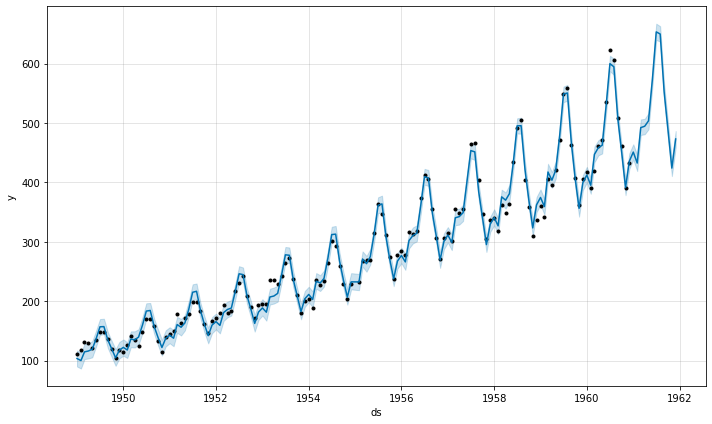

In [14]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df2)
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)
m.plot(forecast);